# 094202 - מבוא לניתוח נתונים בפייתון

# אביב תשפ"ג - תרגיל בית 2

## חלק א' - עיבוד נתונים

### שאלות - כללי

,markdown עבור כל אחת מן השאלות יש לכתוב תשובה ברורה בטקסט בתא

.התשובה חייבת להיות מבוססת על פלט קוד שיופיע בתא קוד

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns
sns.set_palette("viridis")

In [2]:
#Reading the 'aviation_accident_data.csv' file:
df_accident = pd.read_csv('aviation_accident_data.csv')
df_accident

,date,type,operator,fatalities,country,cat,year
0,NaN,Antonov An-12B,Indonesian AF,NaN,NaN,U1,NaN
1,NaN,Antonov An-12B,Indonesian AF,NaN,NaN,U1,NaN
2,NaN,Antonov An-12B,Indonesian AF,NaN,NaN,U1,NaN
3,NaN,Antonov An-12BK,Soviet AF,NaN,Russia,A1,NaN
4,NaN,Antonov An-12BP,Soviet AF,0.0,Eritrea,A1,NaN
...,...,...,...,...,...,...,...
23962,2023-05-11,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,A2,2023.0
23963,2023-05-11,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,A2,2023.0
23964,2023-05-12,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,A1,2023.0
23965,2023-05-14,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,A2,2023.0


#### :שאלה מס' 1
#### ?כמה רשומות יש בקובץ הנתונים

#### Solution

In [3]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        23408 non-null  object 
 1   type        23933 non-null  object 
 2   operator    23963 non-null  object 
 3   fatalities  20029 non-null  float64
 4   country     23129 non-null  object 
 5   cat         23967 non-null  object 
 6   year        23906 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


We can see according to the "info()" of the data frame that there are 23967 entries.

#### :שאלה מס' 2
#### ?כמה ערכים חסרים יש בכל עמודה

#### Solution

In [4]:
print("The number of missing values for each column:")
i = 0
# Iterate over each column in df_accident
for col in df_accident.columns:
    # Calculate the number of missing values for the current column and print the result
    print("The number of missing values of column " 
          + col + ": " + str(df_accident.isna().sum()[i]))
    i += 1;

The number of missing values for each column:
The number of missing values of column date: 559
The number of missing values of column type: 34
The number of missing values of column operator: 4
The number of missing values of column fatalities: 3938
The number of missing values of column country: 838
The number of missing values of column cat: 0
The number of missing values of column year: 61


We can see the number of missing values for each column at the output above.

#### :שאלה מס' 3
#### ?עבור אילו סוגי מטוסים היו לפחות 500 תאונות מתועדות

#### Solution

In [5]:
# Drop rows with missing values in the 'type' column
df_accident_cleaned_type = df_accident.dropna(subset=['type'])

# Count the occurrences of each type of accident
val_counts = df_accident_cleaned_type['type'].value_counts()

# Filter the types of accidents that have at least 500 occurrences
list_of_types = val_counts[val_counts >= 500].index.tolist()

# Print the list of types of accidents
list_of_types


['Douglas C-47A (DC-3)',
 'Douglas C-47 (DC-3)',
 'Douglas C-47B (DC-3)',
 'Curtiss C-46A']

As we can see, there are 4 types of airplanes that had at least 500 documented accidents, listed above.

#### :שאלה מס' 4
#### ?מהו אחוז התאונות המתועדות שהתרחשו בארה"ב

#### Solution

In [6]:
# Drop rows with missing values in the 'country' column
df_accident_cleaned_country = df_accident.dropna(subset=['country'])

# Group the cleaned DataFrame by 'country' and reset the index
gb_country = df_accident_cleaned_country.groupby('country', as_index=False)

# Get the number of rows for the 'USA' country group
num_of_rows_of_USA = gb_country.get_group('USA').apply(len)[0]

# Get the total number of rows for all countries
num_of_rows_of_all_countries = df_accident['country'].value_counts().sum()

# Calculate the percentage of rows for the 'USA' country group
(num_of_rows_of_USA / num_of_rows_of_all_countries) * 100

18.924294176142507

As we can see above, the percentage of documented accidents that occurred in 'USA' is 18.9242 %.

#### :שאלה מס' 5
#### ?איזה קטגוריית תאונה היא הקטלנית ביותר, בממוצע

#### Solution

In [7]:
# Group the DataFrame by 'cat' and calculate the mean of 'fatalities'
gb_cat = df_accident.groupby('cat')['fatalities'].mean(numeric_only=True)

gb_cat

cat
A1     8.338233
A2     0.062728
C1     9.273478
C2     0.642857
H1    85.523810
H2     0.172710
I1     0.000000
I2     0.000000
O1     0.079533
O2     0.031250
U1     0.000000
Name: fatalities, dtype: float64

According to the output above, the deadliest 'cat' is 'H1'(Hijacking with hull-loss) with a mean of 85.5238.

### שאלות - ויזואליזציה

.בחלק זה עליכם ללוות כל תשובה בויזואליזציה (מצג גרפי)

.על הויזואליזציות להיות ברורות ולכלול כותרות ושמות מתאימים לכל הצירים עם גודל גופן קריא

.אין צורך להשתמש בשיטות של בחינת השערות שלמדנו בהרצאות האחרונות בשאלות אלה

#### :שאלה מס' 6

#### 'סעיף א

הראו את ההתפלגות של מספר ההרוגים בתאונות לפי מדינות
(עבור 5 המדינות בהן התרחש מספר
התאונות הגדול ביותר ועבור המטוסים שעבורם קיימים לפחות 500 תאונות מתועדות - מסעיף 3)

 השתמשו בשיטה המסכמת את ההתפלגות ומאפשרת השוואה בין ההתפלגויות השונות (רמז: בתרגולים ראינו שיטה
שמציגה חמישה ערכים מסכמים על ההתפלגות (מינימום, רבעון ראשון, חציון, רבעון שלישי ומקסימום).

#### Solution

Index(['USA', 'Russia', 'U.K.', 'Canada', 'India'], dtype='object')


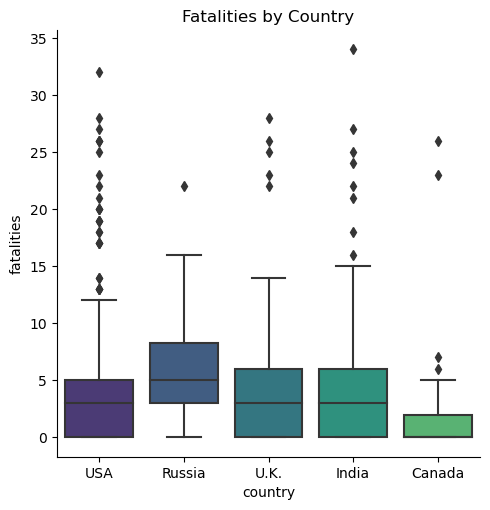

In [8]:
# Get the top 5 countries with the highest number of accidents
top_countries = df_accident['country'].value_counts().head(5).index

# Filter the DataFrame for aircraft accidents with at least 500 documented incidents
filtered_df = df_accident[(df_accident['country'].isin(top_countries))]

filtered_df = filtered_df.groupby('country').filter(lambda x: len(x) >= 500)

# Calculate the number of fatalities by country
fatalities_by_country = filtered_df.groupby('country')['fatalities'].sum()

lst = []

# Iterate over each type in list_of_types
for type in list_of_types:
    # Filter the DataFrame for the current type
    df = filtered_df[filtered_df['type'] == type]
    lst.append(df)

# Concatenate the list of DataFrames into a single DataFrame    
all_rows_df = pd.concat(lst, ignore_index=True)


# Create a categorical plot (box plot) to visualize the relationship between 'country' and 'fatalities'
facegrid = sns.catplot(x="country", y="fatalities", kind="box", data = all_rows_df);
plt.title('Fatalities by Country')

print(top_countries)


#### 'סעיף ב

?לפי הגרף שנוצר, באיזו מדינה חציון מספר ההרוגים הוא הגבוה ביותר

#### Solution

According to the graph, the country with the highest median of fatalities is: Russia

#### :שאלה מס' 7


האם יש קורלציה בין מספר התאונות בכל שנה ולשנה עצמה? בסעיף זה אין צורך להראות חישוב של קו
רגרסיה, ויזואליזציה מספיקה .

#### Solution

Text(-3.9305555555555554, 0.5, 'Number of accidents')

<Figure size 1300x700 with 0 Axes>

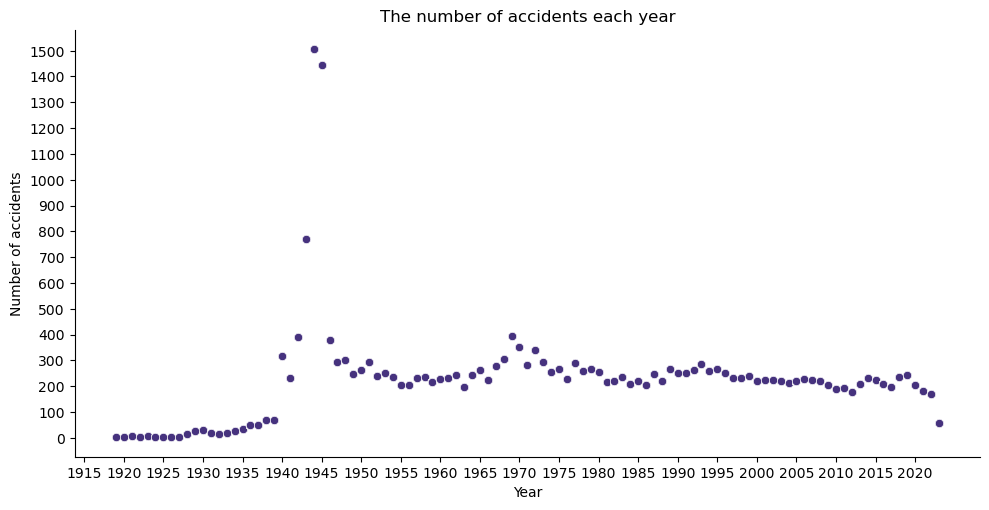

In [9]:
# Drop rows with missing values in the 'year' column and create a copy of the DataFrame
df_accident_cleaned_year = df_accident.dropna(subset=['year']).copy()

# Calculate the count of accidents for each year and create a new 'count' column
df_accident_cleaned_year['count'] = df_accident_cleaned_year.groupby('year')['year'].transform('count')

plt.figure(figsize=(13, 7))

# Create a scatter plot to visualize the number of accidents each year
sns.relplot(data=df_accident_cleaned_year, x='year', y='count', aspect=2)

plt.xticks(range(1915, 2023, 5))
plt.yticks(range(0, 1600, 100))
plt.title('The number of accidents each year')
plt.xlabel('Year')
plt.ylabel('Number of accidents')

According to the graph above, there is no correlation between the number of accidents each year and the year itself.

#### :שאלה מס' 8


מהם שמות עשרת המטוסים "המסוכנים" ביותר (מטוסים שעבורם התרחש מספר התאונות הגדול ביותר)?
הציגו גרף של מספר התאונות של כל אחד

#### Solution

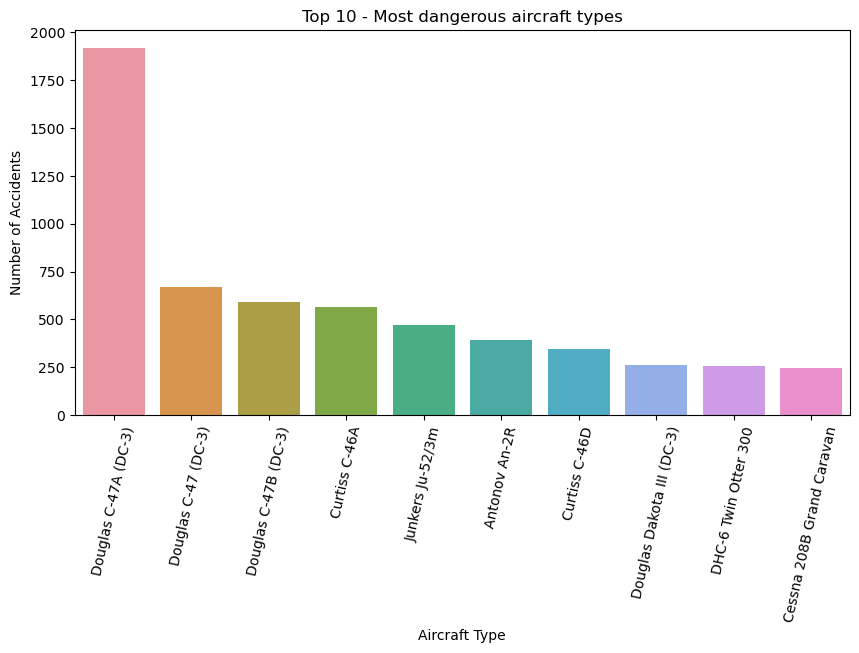

In [10]:
# Remove rows with missing 'type' values
df_accident_cleaned_type = df_accident.dropna(subset=['type']).copy()

# Count the number of accidents for each aircraft type
df_accident_cleaned_type['count'] = df_accident_cleaned_type.groupby('type')['type'].transform('count')

# Get the top 10 types with the highest number of accidents
top_10_types = df_accident_cleaned_type['type'].value_counts().head(10).index

# Filter the dataframe to include only the rows for the top 10 types
lst = []

# Iterate over each type in top_10_types
for type in top_10_types:
    # Filter the DataFrame for the current type
    filt = df_accident['type'] == type
    lst.append(df_accident[filt])
    
# Concatenate the list of DataFrames into a single DataFrame     
all_rows_df = pd.concat(lst, ignore_index=True)

# Plot the number of accidents for each type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=all_rows_df)
plt.title('Top 10 - Most dangerous aircraft types')
plt.xticks(rotation=77.5)
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.show()

The most 10 dangerous aircraft types are:

In [11]:
top_10_types

Index(['Douglas C-47A (DC-3)', 'Douglas C-47 (DC-3)', 'Douglas C-47B (DC-3)',
       'Curtiss C-46A', 'Junkers Ju-52/3m', 'Antonov An-2R', 'Curtiss C-46D',
       'Douglas Dakota III (DC-3)', 'DHC-6 Twin Otter 300',
       'Cessna 208B Grand Caravan'],
      dtype='object')

#### :שאלה מס' 9

מי הם שלושת המפעילים "המסוכנים" ביותר (מפעילים שבצי שלהם יש לפחות מטוס מסוכן אחד מעשרת
המטוסים המסוכנים ביותר שביצע תאונה ומספר התאונות שהתבצעו בהם הוא הגדול ביותר)? הציגו את
מספר התאונות שהתרחשו עבור כל מפעיל.

#### Solution

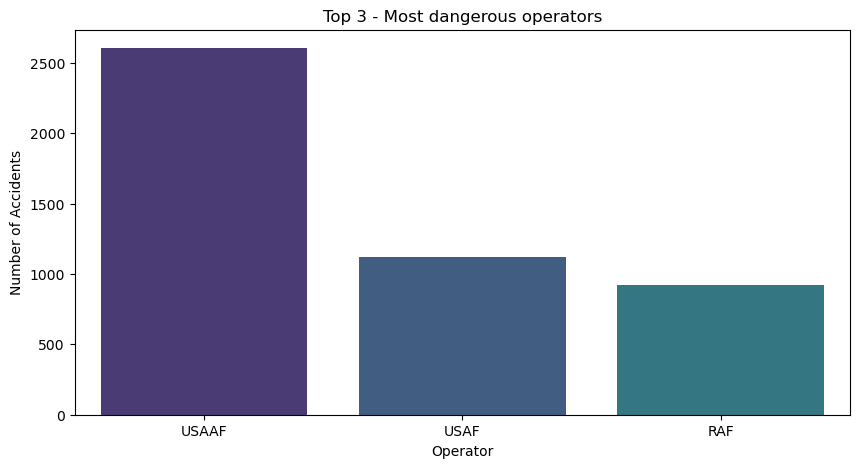

USAAF    2604
USAF     1120
RAF       920
Name: operator, dtype: int64


In [12]:
# Remove rows with missing 'operator' values and create a copy of the DataFrame
df_accident_cleaned_operator = df_accident.dropna(subset=['operator']).copy()

# Count the number of accidents for each operator and create a new 'count' column
df_accident_cleaned_operator['count'] = df_accident_cleaned_operator.groupby('operator')['operator'].transform('count')

# Get the list of operators sorted by the number of occurrences
operators = df_accident_cleaned_operator['operator'].value_counts().index

lst = []

# Iterate over each operator in the list of operators
for operator in operators:
    # Filter the DataFrame for the current operator
    df_accident_opertor = df_accident[df_accident['operator'] == operator]
    
    # Check if the operator has any accidents of the top 10 types
    b = df_accident_opertor['type'].isin(top_10_types)
    if(b.any() == True):
        lst.append(df_accident[df_accident['operator'] == operator])

# Concatenate the list of DataFrames into a single DataFrame
all_rows_df = pd.concat(lst, ignore_index=True)

# Count the number of accidents for each operator in the filtered DataFrame
top_3_operators = all_rows_df['operator'].value_counts().head(3)

# Plot the number of accidents for each operator
plt.figure(figsize=(10, 5))
sns.barplot(x=top_3_operators.index, y=top_3_operators.values)
plt.title('Top 3 - Most dangerous operators')
plt.xlabel('Operator')
plt.ylabel('Number of Accidents')
plt.show()

print(top_3_operators)

The most 3 dangerous operators are:

In [13]:
top_3_operators = all_rows_df['operator'].value_counts().head(3).index
top_3_operators

Index(['USAAF', 'USAF', 'RAF'], dtype='object')

#### :שאלה מס' 10

#### 'סעיף א

האם מספר התאונות של שלושת המטוסים המסוכנים ביותר פוחת במשך השנים? ספקו שני הסברים
אפשריים לתשובה שמצאתם .

#### Solution

<Figure size 1300x700 with 0 Axes>

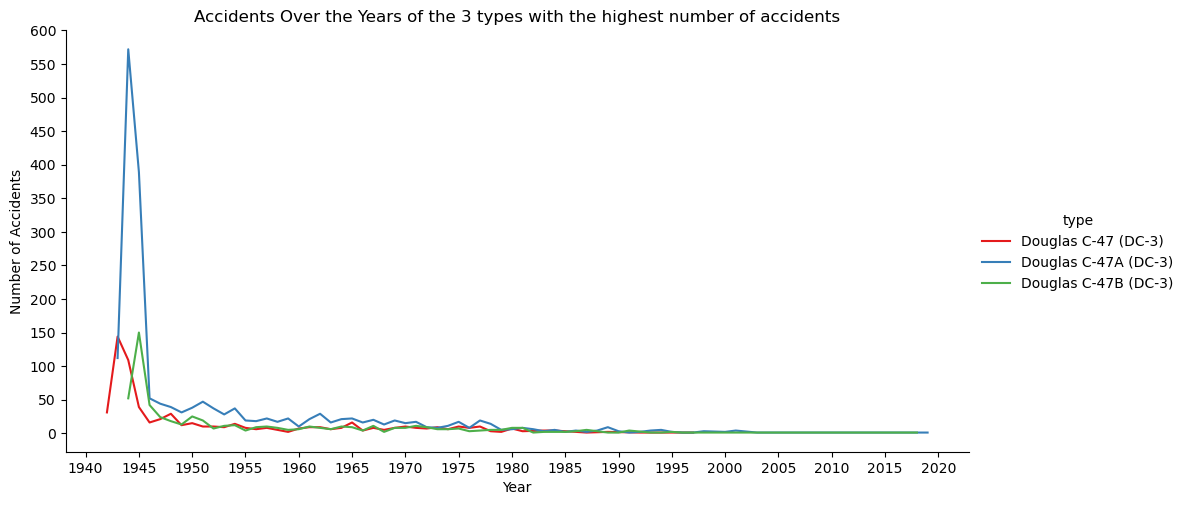

In [14]:
# Remove rows with missing 'type' values
df_accident_cleaned_type = df_accident.dropna(subset=['type']).copy()

# Group by 'type' and 'year' and count the number of accidents
df_accident_count = df_accident_cleaned_type.groupby(['type', 'year']).size().reset_index(name='count')

# Get the top 3 types with the highest number of accidents
top_3_types = df_accident_count.groupby('type')['count'].sum().nlargest(3).index

# Filter data for the top 3 types
df_top_3_types = df_accident_count[df_accident_count['type'].isin(top_3_types)]

# Set the figure size
plt.figure(figsize=(13, 7))

# Plot accidents for each type
sns.relplot(data=df_top_3_types, kind='line', x='year', y='count', hue='type', palette='Set1' , aspect=2)

plt.xticks(range(1940, 2023, 5))
plt.yticks(range(0, 650, 50))
plt.title("Accidents Over the Years of the 3 types with the highest number of accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

plt.show()


According to the following graph, there was a significant decrease from 1945 to 1990 in the number of accidents each year,
And from 1995 the number of accidents in that year onwards slowly decreases even more.

Two reasons for this:
1. These types of aircraft were supposedly used mainly in World War II, therefore after the end of the war, the uses of these military aircraft decreased significantly.
2. These are airplanes, which according to the graph were already in use in World War II 1945 (if there were documented accidents, then it is clear that they were used then),
And since then there has been a huge leap in technology,
Therefore, better military planes were invented, so the use of those old planes decreased over the years.

#### 'סעיף ב

נסו להסביר את התצפיות החריגות (רמז: התשובה לא נמצאת בקובץ הנתונים, תצטרכו לבצע מחקר קצר
ולחשוב על ההסבר )

#### Solution

We found that all 3 of these planes are versions of a plane whose main use was in World War II.
In addition, this type of aircraft was also used during the Indo-Pakistani War in 1947 and in addition, again by the US in the Vietnam War which ended around 1975.
In addition, we also found that since 2008 the US Air Force stopped using it, and today this type of plane (of which the three planes in the graph are different versions) is mainly used as a museum exhibit and for private flights.
Therefore, the drastic decline shortly after 1945 and the moderate decline until about 1980 (the end of the Vietnam War) and the number of accidents tending to zero since around 2010, are consistent with our brief study.

## חלק ב'- בדיקת השערות וסימולציה

.ממבחני בדיקת השעות מסוימים כמפורט מטה p-value בתרגיל זה נרצה לייצר היסטוגרמה של ערכי

:לשם כך, עליכם לבצע את השלבים הבאים

#### :שאלה מס' 1

. גובה אדם בוגר באוכלוסייה מסוימת מתפלג נורמלית עם ממוצע (למעשה, תוחלת) 175 ס"מ וסטיית תקן של
6 ס"מ.

.כדי להגריל מדגם בגודל 40 של גבהים מאוכלוסייה זו np.random.normal השתמשו בפקודה

.הציגו בגרף את ההתפלגות של הנתונים

#### Solution

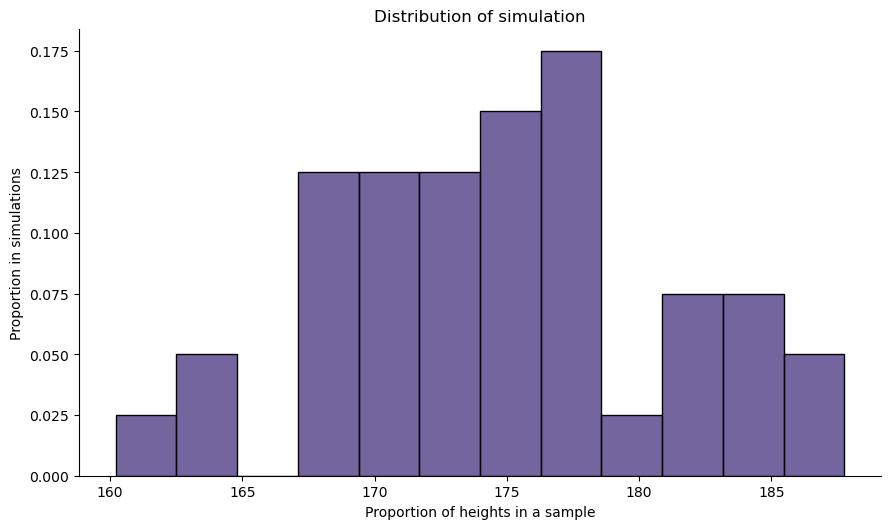

In [15]:
mean_height = 175
standard_deviation = 6
sample_size = 40

# Define a function to generate a sample of heights
def height_Distribution():
    # Generate a random sample from a normal distribution with the specified mean and standard deviation
    sample_heights = np.random.normal(loc=mean_height, scale=standard_deviation, size=sample_size)
    return sample_heights

# Generate a sample of heights with the defined function
arr_of_heights_40 = np.array(height_Distribution())

# Create a histogram of the sample heights
facetgrid_obj = sns.displot(arr_of_heights_40, bins=12, stat='probability')
facetgrid_obj.fig.set_size_inches(10, 5)
facetgrid_obj.set(title='Distribution of simulation',
                  xlabel='Proportion of heights in a sample', ylabel='Proportion in simulations')

#### 'סעיף א

(probability distribution)האם זהו גרף של ההתפלגות האמיתית

?(empirical distribution)או ההתפלגות האמפירית

#### Solution

according to the fact that our distribution based on observetion from the simulation, this distribution is empirical. 

#### 'סעיף ב

?מהו ממוצע הגבהים במדגם שקיבלתם

#### Solution

In [16]:
print(f"The average height in the sample we received is {np.mean(arr_of_heights_40):.2f} cm")

The average height in the sample we received is 174.83 cm


#### 'סעיף ג

?מהי צורת ההתפלגות שקיבלתם

(התפלגות סימטרית, מוטה לימין או לשמאל)skewness-בפרט, מהם ה

(התפלגות עם שיא יחיד, שני שיאים, שיאים רבים אחידה)modality-וה

#### Solution

In accordance with the fact that our sample includes only 40 observations, the shape of the distribution of the graph is not consistent in each experiment and therefore we cannot conclude about a single distribution shape of the graph we received and in addition about the number of peaks that are obtained in the graph and therefore we cannot conclude about the skewness and the modality of our graph.
If we were to take a sample of 1000 observations, we would expect to get a symmetrical graph centered around 175 cm.
Also, we were supposed to get one peak as well around 175cm.
The reason for the expected change stems from the fact that we relied on the fact that the height of an adult in a certain population is normally distributed with an average of 175 cm and a standard deviation of 6 cm.

#### :שאלה מס' 2

נניח כי אינכם יודעים מה מקור המדגם שהגרלתם בסעיף 1 ואתם מעוניינים לבדוק את ההשערה שממוצע
הגבהים באוכלוסייה ממנה הוא נלקח שווה ל- 175 ס"מ או שהוא נמוך מ- 175

#### 'סעיף א

נסחו את השערת האפס וההשערה האלטרנטיבית

#### Solution

Denote by $Ah$ The average height of the population
$$ H_0: Ah = 175\\
H_1: Ah < 175
$$

while the standard deviation is 6 cm

The null hypothesis: the average height in the population from which a sample was taken is equal to 175 cm

Alternative hypothesis: the average height in the population from which the sample was taken is less than 175 cm

#### 'סעיף ב

בדקו את ההשערה באמצעות סימולציות. הניחו שסטיית התקן באוכלוסייה ידועה ועומדת על 6 ס"מ

השתמשו ב- 2000 סימולציות

#### Solution

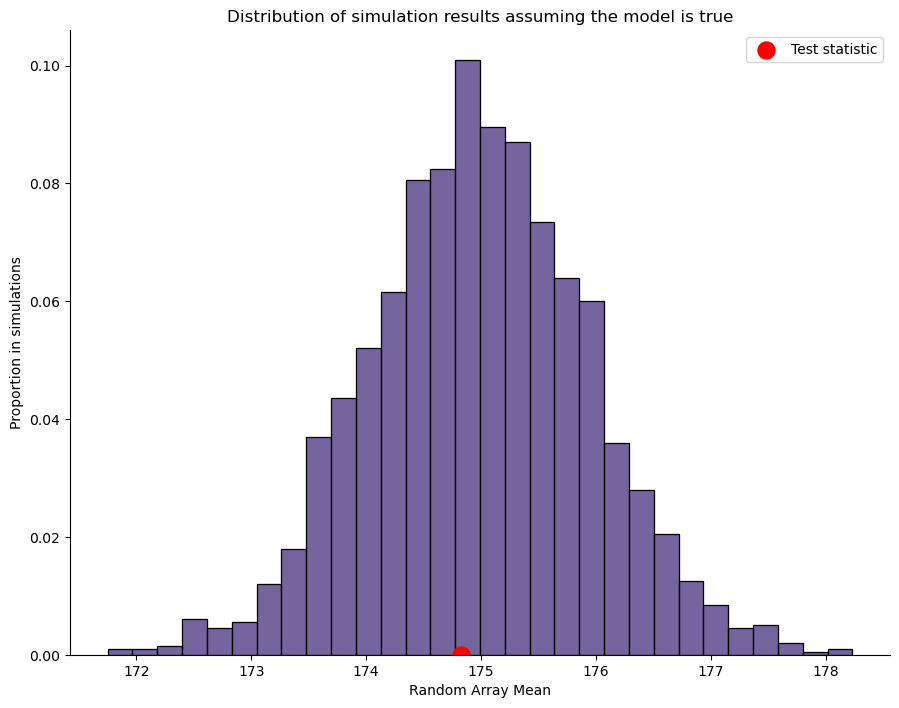

In [17]:
mean_height = 175
standard_deviation = 6
sample_size = 40
test_statistic = np.mean(arr_of_heights_40)  # Calculate the test statistic from the observed sample
num_repetitions = 2000

arr_of_means_2000 = np.empty(num_repetitions)

# Perform multiple simulations to generate sample means
for i in range(num_repetitions):
    arr_of_means_2000[i] = np.random.normal(loc=mean_height, scale=standard_deviation, size=sample_size).mean()

# Create a plot of the sample means
facetgrid_obj = sns.displot(arr_of_means_2000, bins=30, stat='probability')
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of simulation results assuming the model is true',
                  xlabel='Random Array Mean', ylabel='Proportion in simulations')

# Add the test statistic as a red point on the plot
facetgrid_obj.axes[0, 0].scatter(test_statistic, 0, s=150, color='red')
facetgrid_obj.axes[0, 0].legend(['Test statistic'])


#### 'סעיף ג

שקיבלתם p-value-מהו ערך ה 

#### Solution

In [18]:
# Count the number of simulations less than or equal to the observed test statistic
num_simulations = np.count_nonzero(arr_of_means_2000 <= test_statistic)

# Calculate the p-value by dividing the count by the total number of simulations
p_value = num_simulations / num_repetitions

# Print the calculated p-value
print(f'The p-value is {p_value}')


The p-value is 0.433


#### 'סעיף ד

? מהי מסקנתכם אם רמת המובהקות הנדרשת היא 0.1 ? ואם היא 0.01

#### Solution

According to the P-value we received it can be seen that there is no significant difference between 0.1 and 0.01 since our P-value is not in one of the tails of the empirical distribution and therefore the level of "statistical significance" is low.
Also, in each run of the simulation, the P-values are not concentrated around a certain value, but spread widely, which prevents us from concluding anything about the level of statistical significance.
Therefore, we cannot reject the null hypothesis.

#### :שאלה מס' 3

(או קטן ממנו)0_mean-של המבחן הבודק את ההשערה שממוצע הגבהים באוכלוסייה שווה ל p-value ומחזירה n באורך sample_heights אשר מקבלת מדגם של גבהים get_p_value_heights(sample_heights, n, mean_0)ממשו את הפונקציה 

.תחת ההנחה שסטיית התקן באוכלוסייה עומדת על 6 ס"מ

#### Solution

In [19]:
def get_p_value_heights(sample_heights, n, mean_0):
    standard_deviation = 6
    num_repetitions_2000 = 2000
    
    # Create an empty array to store the simulated sample means
    arr_of_heights_2000 = np.empty(num_repetitions_2000)
    
    # Run the simulations to generate sample means
    for i in range(num_repetitions):
        arr_of_heights_2000[i] = np.mean(np.random.normal(loc=mean_0, scale=standard_deviation, size=n))
    
    # Calculate the observed test statistic
    test_statistic = np.mean(sample_heights)
    
    # Count the number of simulations less than or equal to the observed test statistic
    num_simulations = np.count_nonzero(arr_of_heights_2000 <= test_statistic)
    
    # Calculate and return the p-value
    p_value = num_simulations / num_repetitions_2000
    return p_value


#### :שאלה מס' 4

.כעת, באמצעות הפונקציה מסעיף 3, נרצה לחזור 5000 פעמים על התהליך מסעיפים 1 ו- 2

של מבחן הבודק באמצעות המדגם(החדש) את ההשערה שממוצע הגבהים באוכלוסיייה ממנה הוא נלקח שווה ל-175 ס"מ p-value של גבהים באוכלוסייה ואז נמצא n=40 בכל איטרציה של התהליך נגריל מדגם חדש בגודל

(שוב, תחת ההנחה שסטיית התקן היא 6) 

#### 'סעיף א

?כאלה p-value בלי לכתוב קוד, דונו במספר משפטים: איך לדעתכם תראה היסטוגרמה של 5000 ערכי 

?מדוע אתם חושבים כך

(כל עוד התשובה מנומקת היטב, אין תשובה שגויה לשאלה זו. דונו לפני הרצת הסימולציה בפועל)

#### Solution

Since the standard deviation we got (6 cm) is relatively small compared to the average height in the population obtained from the null hypothesis (175 cm) and in accordance with the previous distribution, we are expected to get after 5000 repetitions an empirical distribution centered around 0.5.

#### 'סעיף ב

.שהתקבלו p-value ממשו את התהליך המתואר והציגו את ההיסטוגרמה של ערכי

.(שימו לב: זמן הרצת הקוד עלול להיות ארוך, כדאי לנסות ראשית להריץ עם מס' קטן יותר של איטרציות כדי לראות שהקוד עובד)

#### Solution

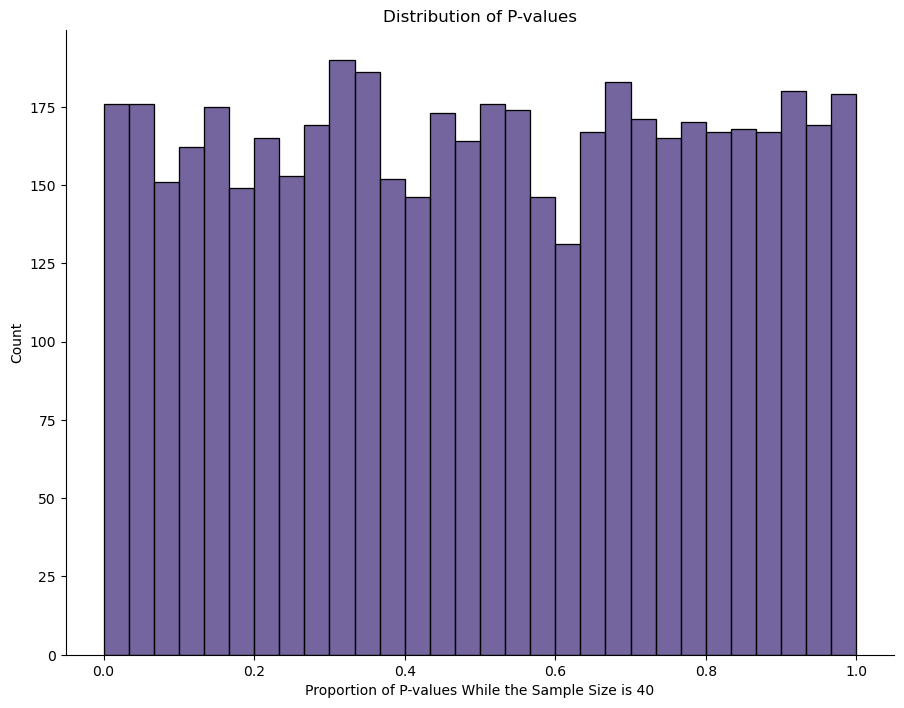

In [20]:
mean_height = 175
mean_0 = mean_height
standard_deviation = 6
sample_size = 40
n = sample_size
num_repetitions_5000 = 5000

# Define a function to generate sample heights
def height_Distribution():
    sample_heights = np.random.normal(loc=mean_height, scale=standard_deviation, size=sample_size)
    return sample_heights

# Generate an array of p-values by calling get_p_value_heights multiple times
arr_of_P_values_5000_40 = np.array([get_p_value_heights(height_Distribution(), n, mean_0)
                                    for _ in range(num_repetitions_5000)])

# Plot the distribution of p-values
facetgrid_obj = sns.displot(arr_of_P_values_5000_40, bins=30, stat='count')
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of P-values',
                  xlabel='Proportion of P-values While the Sample Size is 40', ylabel='Count')


#### 'סעיף ג

?שנוצרו? האם היא תואמת לציפיותיכם p-value מהי (פחות או יותר) צורת ההתפלגות של ערכי

#### Solution

The skewness of the distribution we got is symmetrical and the modality is uniform.
The shape of the obtained distribution does not match our expectations.

#### 'סעיף ד

.p-value שקיבלתם, מהו אחוז הערכים הקטנים מ-0.05? הסבירו בקצרה מדוע זה הגיוני תוך התייחסות להגדרה של p-value מבין ערכי

#### Solution

In [21]:
# Count the number of simulations with p-values smaller than or equal to 0.05
num_simulations = np.count_nonzero(arr_of_P_values_5000_40 <= 0.05)

# Calculate the percentage of values smaller than 0.05
smaller_values = num_simulations / num_repetitions_5000

# Print the percentage of values smaller than 0.05
print(f'The percentage of values smaller than 0.05 is: {smaller_values*100}%')


The percentage of values smaller than 0.05 is: 5.54%


Under the assumption that the null hypothesis is correct, we accepted that the graph of the distribution of the P-value values that we received is uniformly distributed, therefore it makes sense that we accept that the percentage of P-value values that are less than 0.05% will be around 0.05, according to the definition of P-value.

#### :שאלה מס' 5

.הסבירו במס' משפטים ולאחר מכן בדקו באמצעות שינוי הקוד ?n=200-ל n=40-מה לדעתכם יקרה להיסטוגרמה אם גודל כל אחד ממדגמי הגבהים יגדל מ

(שימו לב: זמן הרצת הקוד יהיה ארוך עוד יותר)

#### Solution

According to the law of averages, when the sample space is increased (to 200) the empirical distribution tends to the true distribution more than a smaller sample space (40).

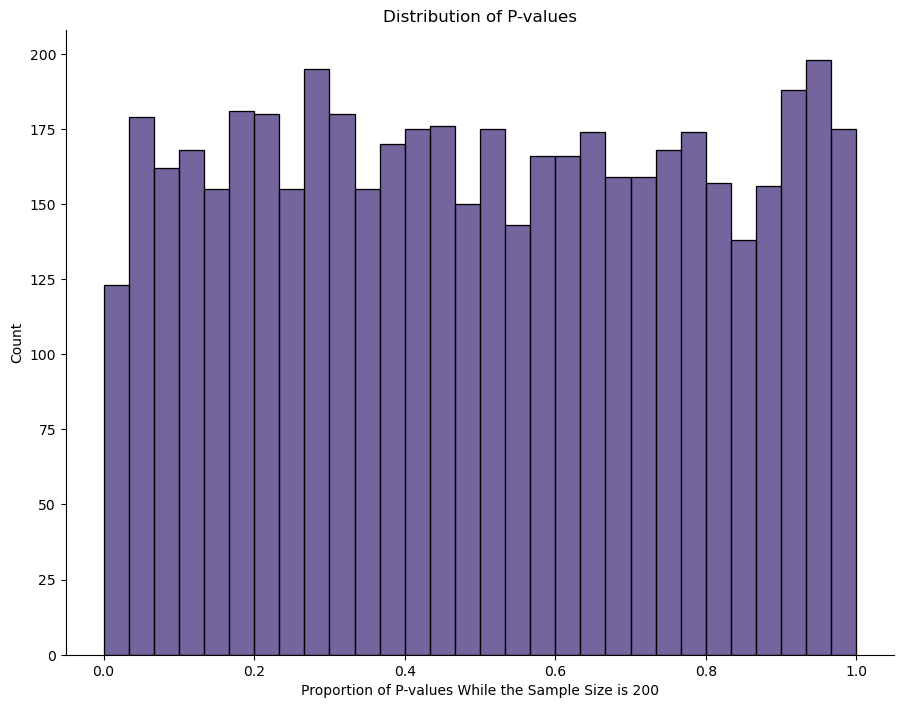

In [22]:
mean_height = 175
mean_0 = mean_height
standard_deviation = 6
sample_size = 200
n = sample_size

num_repetitions_5000 = 5000

# Generate an array of p-values by calling get_p_value_heights function for num_repetitions2 simulations
arr_of_P_values_5000_200 = np.array([get_p_value_heights(height_Distribution(), n, mean_0)
                                     for _ in range(num_repetitions_5000)])

# Create a histogram to visualize the distribution of p-values
facetgrid_obj = sns.displot(arr_of_P_values_5000_200, bins=30, stat='count')
facetgrid_obj.fig.set_size_inches(10, 7)
facetgrid_obj.set(title='Distribution of P-values',
                  xlabel='Proportion of P-values While the Sample Size is 200', ylabel='Count')


We see from the graph that it matches our expectations.